In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='pc'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=False)
import Eq_time_corrs_M_MF

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.004968166351318359  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.003438711166381836  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling rec

In [3]:

fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [4]:


# import importlib     
# importlib.reload(Eq_time_corrs_M_MF) #

In [5]:
trans_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating ten

In [15]:
phiT = 0.0
T=0.001
res_t=trans_corr.MF_corr_eq( args = (0.0, T, phiT, False) )

starting bubble.......
time for bubble... 19.272453784942627


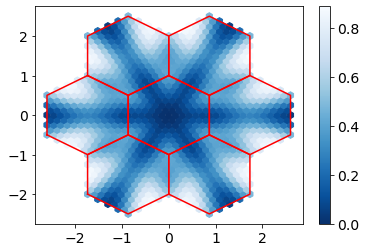

In [16]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [17]:
phiT=0.0
T=0.0
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0, T, phiT, False) )

starting bubble.......
time for bubble... 0.13657093048095703


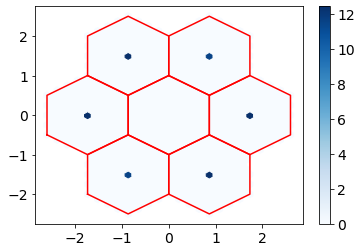

In [18]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [12]:
subl_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'subl', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating ten

In [19]:
phiT=0.0
T=0.001
res_subl=subl_corr.MF_corr_eq( args = (0.0, T, phiT, False) )


starting bubble.......
time for bubble... 19.404810190200806


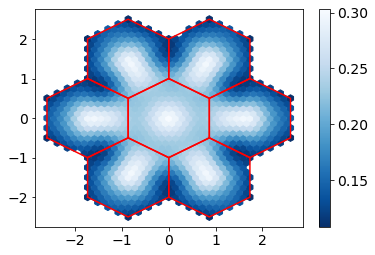

In [20]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [22]:
phiT=0.0
T=0.001
res_tv2=subl_corr.MF_corr_eq_back_v2( args = (0.0, T, phiT, False) )

starting bubble.......
time for bubble... 0.1625053882598877


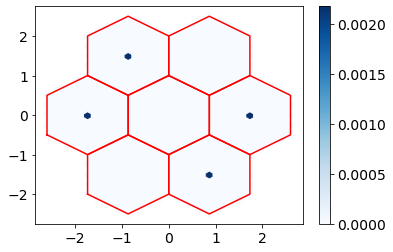

In [23]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [4]:
long_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'long', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating ten

In [7]:
phiT=0.0
T=0.01
resLong=long_corr.MF_corr_eq((0.0, T, phiT, False))

starting bubble.......
time for bubble... 19.424816370010376


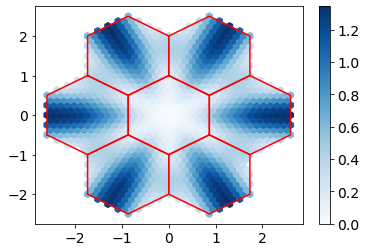

In [8]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [9]:
phiT=0.0
T=0.001
res_tv2=long_corr.MF_corr_eq_back_v2( args = (0.0,T, phiT, False) )

starting bubble.......
time for bubble... 0.13450121879577637


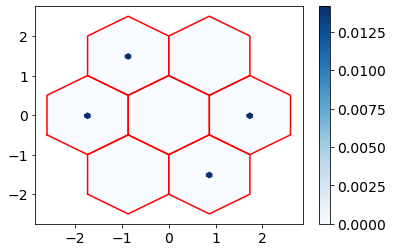

In [11]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [12]:
dens_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'dens', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating ten

In [13]:
phiT=0.0
T=0.01
resden=dens_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 19.213985443115234


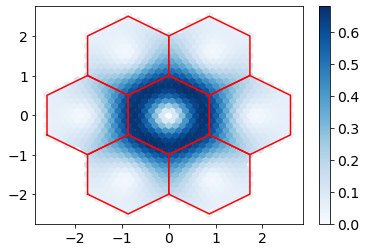

In [14]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resden, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [20]:
phiT=0.0
T=0.001
res_tv2=dens_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.16686177253723145


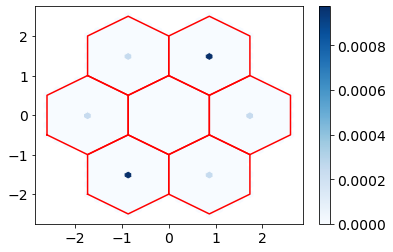

In [21]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()